Goal of Notebook
-----

This notebook helps to understand stats of gospels.

Steps 
-------
    
1. Create a JSON file which includes all the data of count of chapters and verses of each version of gospel. 

2. Conduct EDA in the data 

Find the sampling rules for generating a gospel. Have an idea about number of average chapters and verses. 


In [1]:
import os
import json 
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get all json files from the folder 

json_files = []
path_to_json = '../raw_gospel_data/'
for folder in os.listdir(path_to_json):
    for file in os.listdir(path_to_json + folder):
        if file.endswith('.json'):
            json_files.append(path_to_json + folder + "/" + file)
            
# fetch the stats from the data

stats = []
for file in json_files:
    with open(file, "r") as f:
        data = json.load(f)
        chapter = 1
        verse_count = 1
        record = {}
        for verse in data:
            temp_chapter = verse[2]
            if temp_chapter != chapter:
                record [chapter] = verse_count
                verse_count = 1
                chapter = temp_chapter 
            else:
                verse_count += 1
        record[chapter] = verse_count
        stats.append({file: record})
        
# write stats to a json file 
with open("bible_stats.json", 'w') as outfile:
        json.dump(stats, outfile)

In [11]:
# analysis on number of words of each gospels 

def word_count(file_path):
    with open(file_path, "r") as f:
        data = f.read()
        tokens = data.split()
        tokens = list(filter(lambda a: a not in ["<EOC>", "<SOC>", "<SOV>", "<EOV>"], tokens))
    return len(tokens)

In [44]:
word_cout_list = []
path_to_data = '../training_data/'
for file in os.listdir(path_to_data):
    if file.endswith(".txt"):
        count = word_count(path_to_data + file)
        word_cout_list.append(count)
        gospel_list.append(file)

In [47]:
word_cout_list

[19026,
 30503,
 18145,
 17729,
 30420,
 32471,
 17896,
 30715,
 27678,
 24391,
 28183,
 29523,
 27895,
 22550,
 27792,
 22571,
 29557,
 22737,
 25012,
 22980,
 32386,
 17809,
 30396,
 18832]

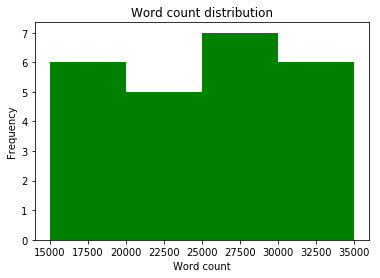

In [48]:
# Plotting histogram to understand the distribution of word counts in various gospels
plt.title("Word count distribution")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.hist(word_cout_list, bins=[15000, 20000, 25000, 30000, 35000], facecolor='g')
plt.show()

As we see it, most of the gospel versions include more than 25000 words. The maximum frequency is between 25000 to 30000. So we'll generate atleast 25000 words from our trained model for our Gospel of LSTM 😉 

In [49]:
# Let's check out the distribution of count of verses in each chapter of each book

verse_list = []
for record in stats:
    temp = list(record.values())[0]
    verse_list.extend(list(temp.values()))

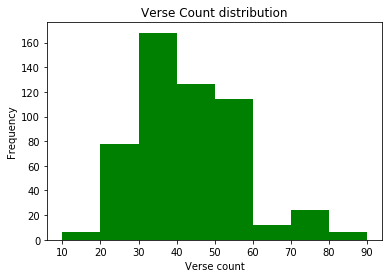

In [50]:
plt.title("Verse Count distribution")
plt.xlabel("Verse count")
plt.ylabel("Frequency")
plt.hist(verse_list, bins=[10,20,30,40,50,60,70,80,90], facecolor='g')
plt.show()

As we see in the plot, the maximum number of verse count is in the range of 20 to 60. So we'll keep these number as minimum and maximum boundaries for our generated gospel. 

In [37]:
# Let's check out the distribution of chapter count of each book

chapter_list = []
for record in stats:
    temp = list(record.values())[0]
    chapter_list.append(max(temp.keys()))

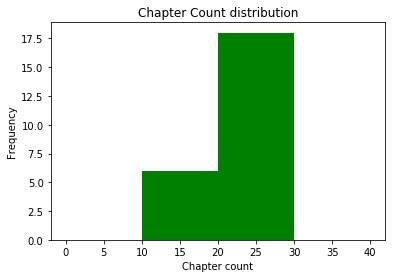

In [40]:
plt.title("Chapter Count distribution")
plt.xlabel("Chapter count")
plt.ylabel("Frequency")
plt.hist(chapter_list, bins=[0,10,20,30,40], facecolor='g')
plt.show()

We will expect our gospel to have some 20 to 30 chapters in it by considering this distribution. 